In [129]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [130]:
df = pd.read_csv(r"Dataset\dataset.csv")

In [131]:
print("Duplicate values counts: ", df.duplicated().sum())

Duplicate values counts:  0


In [132]:
print("Empty values counts: ")
print(df.isnull().sum())

Empty values counts: 
Unnamed: 0                0
Age_Group_18-25           0
Age_Group_26-35           0
Age_Group_36-45           0
Age_Group_46-55           0
Age_Group_56-65           0
Gender_Female             0
Gender_Male               0
Avg_Transaction_Amount    0
Add_to_Cart               0
Browse                    0
Login                     0
Purchase                  0
Label                     0
dtype: int64


In [133]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age_Group_18-25         5000 non-null   bool   
 1   Age_Group_26-35         5000 non-null   bool   
 2   Age_Group_36-45         5000 non-null   bool   
 3   Age_Group_46-55         5000 non-null   bool   
 4   Age_Group_56-65         5000 non-null   bool   
 5   Gender_Female           5000 non-null   bool   
 6   Gender_Male             5000 non-null   bool   
 7   Avg_Transaction_Amount  5000 non-null   float64
 8   Add_to_Cart             5000 non-null   int64  
 9   Browse                  5000 non-null   int64  
 10  Login                   5000 non-null   int64  
 11  Purchase                5000 non-null   int64  
 12  Label                   5000 non-null   object 
dtypes: bool(7), float64(1), int64(4), object(1)
memory usage: 268.7+ KB


In [135]:
df["Label"].value_counts()

Label
No Fraud    3531
Fraud       1469
Name: count, dtype: int64

In [136]:
#label encoding the object data.
from sklearn.preprocessing import LabelEncoder

# Store original column names
original_columns = df.select_dtypes(include=['object', 'bool']).columns

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical variable
for col in original_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Print the mapping between original categories and numerical labels
for col, encoder in label_encoders.items():
    print(f"Mapping for column '{col}':")
    for label, category in enumerate(encoder.classes_):
        print(f"Label {label}: {category}")

Mapping for column 'Age_Group_18-25':
Label 0: False
Label 1: True
Mapping for column 'Age_Group_26-35':
Label 0: False
Label 1: True
Mapping for column 'Age_Group_36-45':
Label 0: False
Label 1: True
Mapping for column 'Age_Group_46-55':
Label 0: False
Label 1: True
Mapping for column 'Age_Group_56-65':
Label 0: False
Label 1: True
Mapping for column 'Gender_Female':
Label 0: False
Label 1: True
Mapping for column 'Gender_Male':
Label 0: False
Label 1: True
Mapping for column 'Label':
Label 0: Fraud
Label 1: No Fraud


In [137]:
X = df.drop("Label", axis=1)
y = df["Label"]

In [138]:
# Handle class imbalance with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [139]:
X_resampled

,Age_Group_18-25,Age_Group_26-35,Age_Group_36-45,Age_Group_46-55,Age_Group_56-65,Gender_Female,Gender_Male,Avg_Transaction_Amount,Add_to_Cart,Browse,Login,Purchase
0,0,0,0,0,1,0,0,674.330112,0,5,2,3
1,1,0,0,0,0,0,1,513.363208,2,4,1,3
2,1,0,0,0,0,1,0,968.048672,2,5,1,1
3,1,0,0,0,0,0,0,297.080606,0,5,2,4
4,0,1,0,0,0,1,0,629.070774,3,5,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
7057,0,0,0,0,0,0,0,728.122264,1,6,4,5
7058,0,0,0,0,0,0,0,245.504148,3,7,1,3
7059,0,0,0,0,0,0,0,354.778168,3,6,2,4
7060,1,0,0,0,0,0,0,426.859864,2,7,3,5


In [140]:
y_resampled

0       1
1       1
2       1
3       1
4       0
       ..
7057    0
7058    0
7059    0
7060    0
7061    0
Name: Label, Length: 7062, dtype: int32

In [141]:
y_resampled.value_counts()

Label
1    3531
0    3531
Name: count, dtype: int64

In [142]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Algorithm Implemendation

## Random Forest Classifier

Accuracy: 0.716206652512385

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.70      0.71       694
           1       0.71      0.74      0.73       719

    accuracy                           0.72      1413
   macro avg       0.72      0.72      0.72      1413
weighted avg       0.72      0.72      0.72      1413



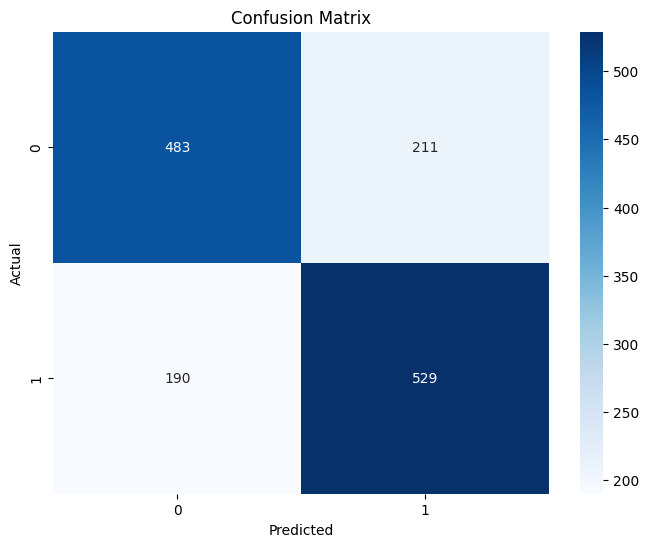

In [143]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test data
rf_y_pred = rf_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy:", rf_accuracy)

# Classification Report
rf_cr = classification_report(y_test, rf_y_pred)
print("\nClassification Report:\n", rf_cr)

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Gradient Boosting Classifier

Accuracy: 0.6985138004246284

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69       694
           1       0.70      0.71      0.71       719

    accuracy                           0.70      1413
   macro avg       0.70      0.70      0.70      1413
weighted avg       0.70      0.70      0.70      1413



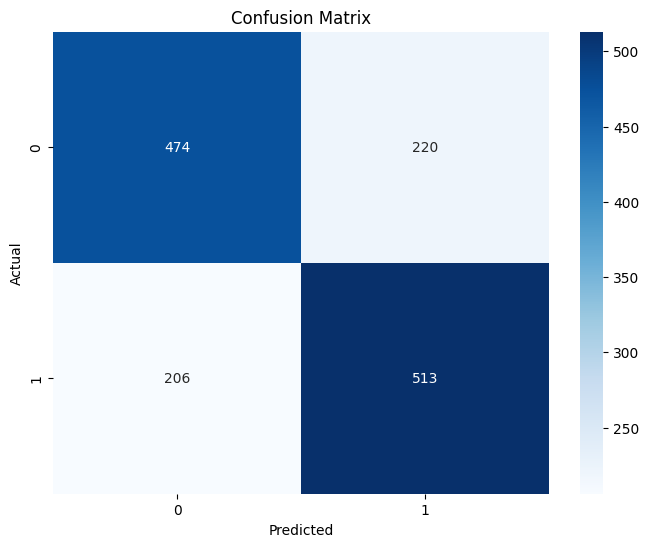

In [144]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting model
gbc_model = GradientBoostingClassifier()

# Fit the model
gbc_model.fit(X_train, y_train)

# Predict on test data
gbc_y_pred = gbc_model.predict(X_test)

# Accuracy
gbc_accuracy = accuracy_score(y_test, gbc_y_pred)
print("Accuracy:", gbc_accuracy)

# Classification Report
gbc_cr = classification_report(y_test, gbc_y_pred)
print("\nClassification Report:\n", gbc_cr)

# Confusion Matrix
gbc_cm = confusion_matrix(y_test, gbc_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(gbc_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## AdaBoost Classifier

Accuracy: 0.6836518046709129

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68       694
           1       0.70      0.67      0.68       719

    accuracy                           0.68      1413
   macro avg       0.68      0.68      0.68      1413
weighted avg       0.68      0.68      0.68      1413



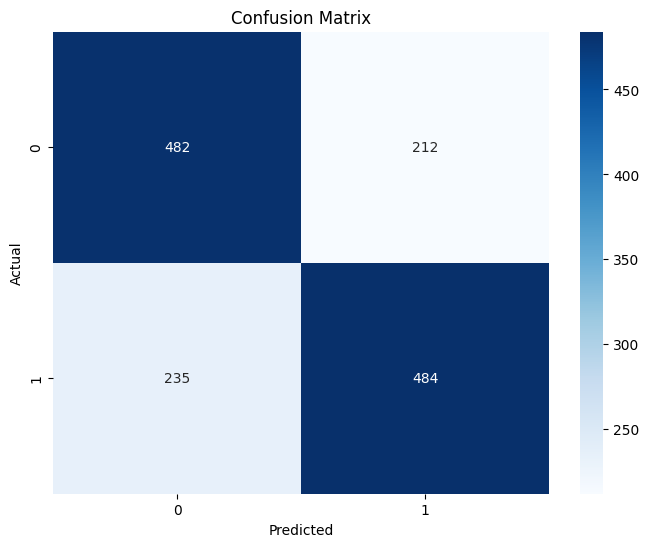

In [145]:
from sklearn.ensemble import AdaBoostClassifier

# Create the Adaboost model
ab_model = AdaBoostClassifier()

# Fit the model
ab_model.fit(X_train, y_train)

# Predict on test data
ab_y_pred = ab_model.predict(X_test)

# Accuracy
ab_accuracy = accuracy_score(y_test, ab_y_pred)
print("Accuracy:", ab_accuracy)

# Classification Report
ab_cr = classification_report(y_test, ab_y_pred)
print("\nClassification Report:\n", ab_cr)

# Confusion Matrix
ab_cm = confusion_matrix(y_test, ab_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(ab_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Stacking Classifier

[LightGBM] [Info] Number of positive: 2812, number of negative: 2837
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 5649, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497787 -> initscore=-0.008851
[LightGBM] [Info] Start training from score -0.008851
[LightGBM] [Info] Number of positive: 2250, number of negative: 2269
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 4519, number of used features: 12
[LightGBM] [Info] [binary:

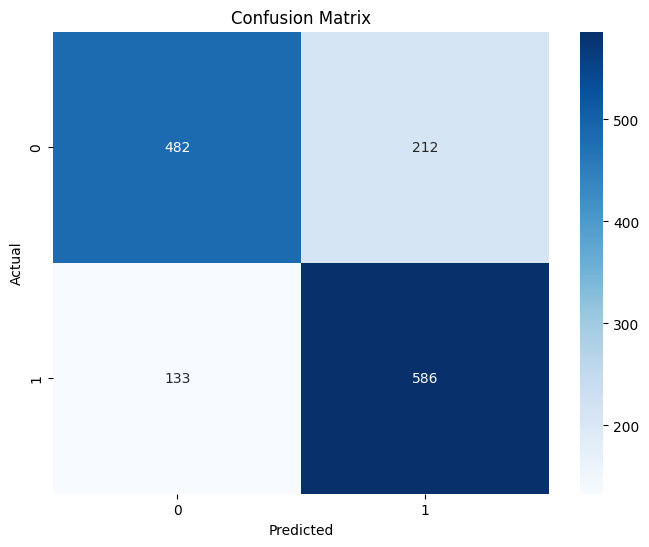

In [146]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Base models
base_models = [
    ('svc', SVC()),
    ('knn', KNeighborsClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('xgboost', XGBClassifier()),
    ('lightgbm', LGBMClassifier())
]


# meta-classifier
meta_classifier = MLPClassifier()

# Create the Stacking Classifier model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_classifier)


# Fit the model
stacking_model.fit(X_train, y_train)

# Predict on test data
stackingy_pred = stacking_model.predict(X_test)

# Accuracy
stackingy_accuracy = accuracy_score(y_test, stackingy_pred)
print("Accuracy:", stackingy_accuracy)

# Classification Report
stackingy_cr = classification_report(y_test, stackingy_pred)
print("\nClassification Report:\n", stackingy_cr)

# Confusion Matrix
stacking_cm = confusion_matrix(y_test, stackingy_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(stacking_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

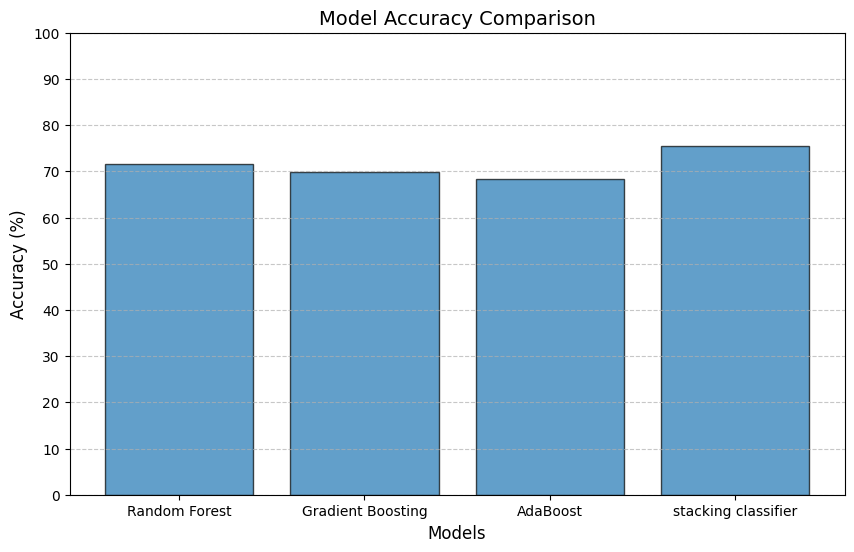

In [147]:
import matplotlib.pyplot as plt

# Example accuracy scores from multiple models
models = ['Random Forest', 'Gradient Boosting', 'AdaBoost', 'stacking classifier']
accuracies = [rf_accuracy, gbc_accuracy, ab_accuracy, stackingy_accuracy]

# Adjusting the accuracy values to a percentage scale (0 to 100)
accuracies_percentage = [accuracy * 100 for accuracy in accuracies]

# Plotting the accuracy comparison graph with percentages
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies_percentage, alpha=0.7, edgecolor='black')
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(range(0, 101, 10), fontsize=10)
plt.show()

In [ ]:
# Save Model
import pickle

with open('Models/random_forest.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('Models/gradient_boost.pkl', 'wb') as f:
    pickle.dump(gbc_model, f)

with open('Models/adabost.pkl', 'wb') as f:
    pickle.dump(ab_model, f)

with open('Models/stacking_clf.pkl', 'wb') as f:
    pickle.dump(stacking_model, f)